<a href="https://colab.research.google.com/github/daisei0311/daisei_his.github.io/blob/main/20240705_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2

In [ ]:

f = open("/content/drive/MyDrive/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

In [ ]:
df=pd.read_csv("/content/train-metadata.csv")
df.head()

<ipython-input-27-f258f7c267af>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/train-metadata.csv")


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [ ]:
!pip install --upgrade kaggle

In [41]:
!kaggle competitions download -c isic-2024-challenge

isic-2024-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!pip install isic-cli
!isic image download /content/drive/MyDrive/ISIC_skin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
If you have been granted special permissions, logging in with `isic user login` might return more data.


Aborted!
^C


<ipython-input-36-1f4054532f8a>:5: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(directory + '/train-metadata.csv')
<ipython-input-36-1f4054532f8a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(nan_sex['anatom_site_general'], ax = ax1,palette='viridis')
<ipython-input-36-1f4054532f8a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  b = sns.countplot(is_sex['anatom_site_general'], ax = ax2,palette='plasma')
<ipython-input-36-1f4054532f8a>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
<ipython-input-36-1f4054532f

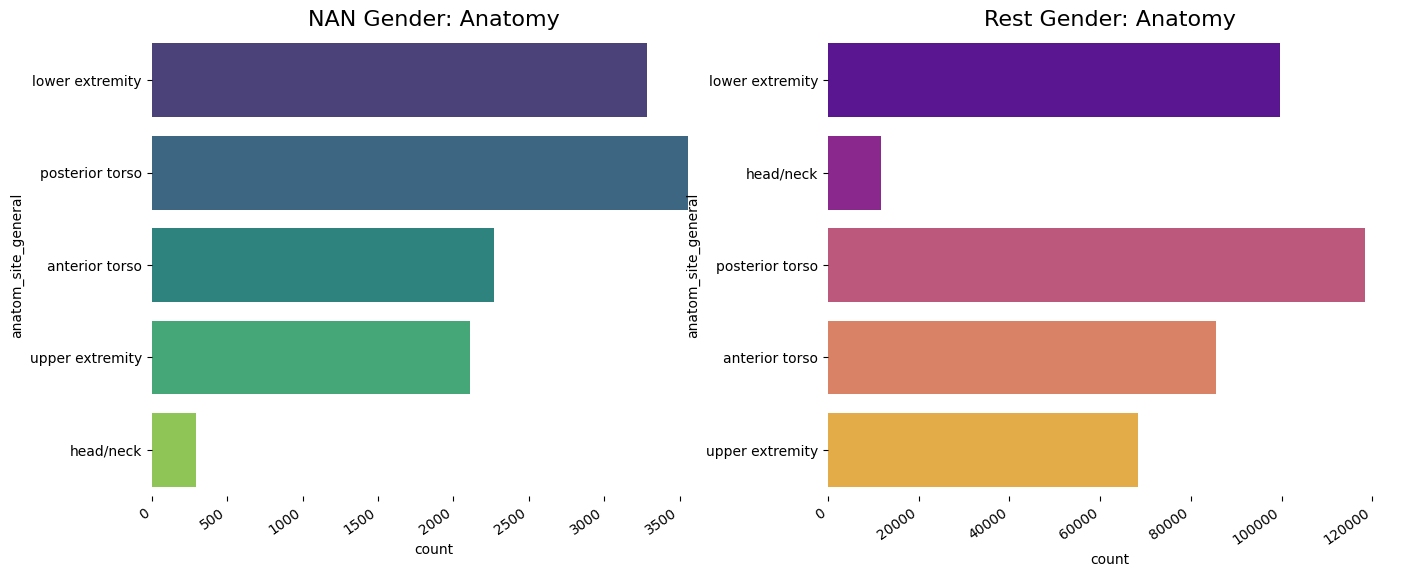

In [ ]:
# Directory
directory = '/content'

# Import the 2 csv s
train_df = pd.read_csv(directory + '/train-metadata.csv')
test_df = pd.read_csv(directory + '/test-metadata.csv')

# Data
nan_sex = train_df[train_df['sex'].isna() == True]
is_sex = train_df[train_df['sex'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

# データを集計し、降順でソート
value_counts = df['anatom_site_general'].value_counts()
sorted_categories = value_counts.index

a = sns.countplot(nan_sex['anatom_site_general'], ax = ax1,palette='viridis', order=sorted_categories)
b = sns.countplot(is_sex['anatom_site_general'], ax = ax2,palette='plasma', order=sorted_categories)
ax1.set_title('NAN Gender: Anatomy', fontsize=16)
ax2.set_title('Rest Gender: Anatomy', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
# print('Out of 65 NAN values, {} are benign and 0 malignant.'.format(nan_sex['benign_malignant'].value_counts()[0]))


In [40]:
train_df['clin_size_long_diam_mm'].value_counts()[:20]

clin_size_long_diam_mm
2.60     14545
2.70      8126
3.00      7414
2.74      7292
2.88      6537
         ...  
17.13        2
15.59        2
13.61        2
16.08        2
20.00        2
Name: count, Length: 1494, dtype: int64

In [39]:
train_df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [56]:
fnames=glob.glob('/content/train-image/image/*')[:20]

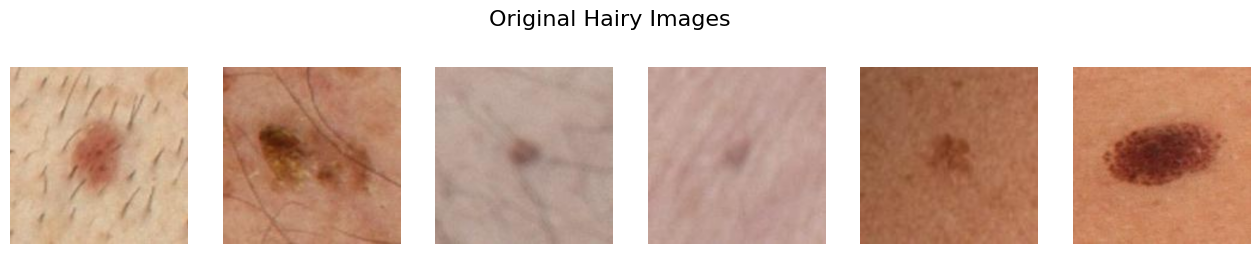

In [51]:
import matplotlib.image as mpimg

image_hair = np.array(fnames)[[1, 2, 8, 11, 13, 17]]

def hair_remove(image):
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))

    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)

    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)

    return final_image

# Show the Augmented Images
plt.figure(figsize=(16,3))
plt.suptitle("Original Hairy Images", fontsize = 16)

for k, path in enumerate(image_hair):
    image = mpimg.imread(path)
    image = cv2.resize(image,(300, 300))

    plt.subplot(1, 6, k+1)
    plt.imshow(image)
    plt.axis('off')

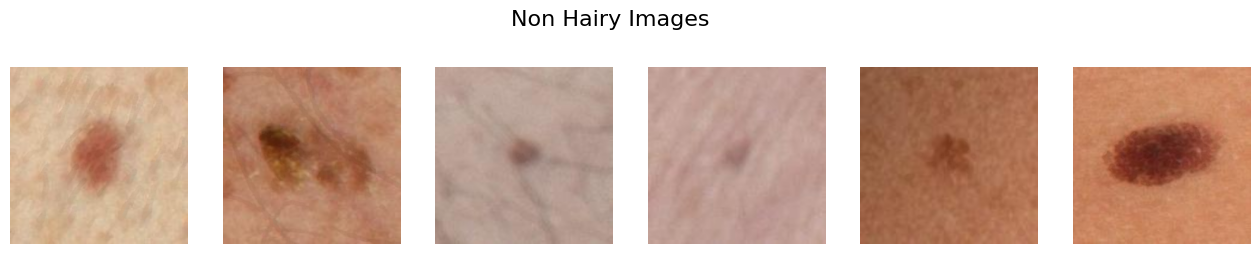

In [50]:
# Show the sample
plt.figure(figsize=(16,3))
plt.suptitle("Non Hairy Images", fontsize = 16)

for k, path in enumerate(image_hair):
    image = mpimg.imread(path)
    image = cv2.resize(image,(300, 300))
    image = hair_remove(image)

    plt.subplot(1, 6, k+1)
    plt.imshow(image)
    plt.axis('off')

In [53]:
def apply_transformations(image_paths):
    selected_images = np.random.choice(image_paths, 3, replace=False)

    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
    methods = ["Without Gaussian Blur", "With Gaussian Blur", "Hue, Saturation, Brightness", "LUV Color Space", "Greyscale + Gaussian Blur"]

    for index, method in enumerate(methods):
        for i, path in enumerate(selected_images):
            image = cv2.imread(path)

            if method == "Without Gaussian Blur":
                transformed_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                transformed_image = cv2.resize(transformed_image, (200, 200))

            elif method == "With Gaussian Blur":
                transformed_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                transformed_image = cv2.resize(transformed_image, (200, 200))
                transformed_image = cv2.addWeighted(transformed_image, 4, cv2.GaussianBlur(transformed_image, (0, 0), 256/10), -4, 128)

            elif method == "Hue, Saturation, Brightness":
                transformed_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
                transformed_image = cv2.resize(transformed_image, (200, 200))

            elif method == "LUV Color Space":
                transformed_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
                transformed_image = cv2.resize(transformed_image, (200, 200))

            elif method == "Greyscale + Gaussian Blur":
                transformed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                transformed_image = cv2.resize(transformed_image, (200, 200))
                transformed_image = cv2.GaussianBlur(transformed_image, (5, 5), 0)

            axes[index, i].imshow(transformed_image, cmap=plt.cm.bone if len(transformed_image.shape) == 2 else None)
            axes[index, i].axis('off')
            axes[index, i].set_title(method, fontsize=10)

    plt.tight_layout()
    plt.show()

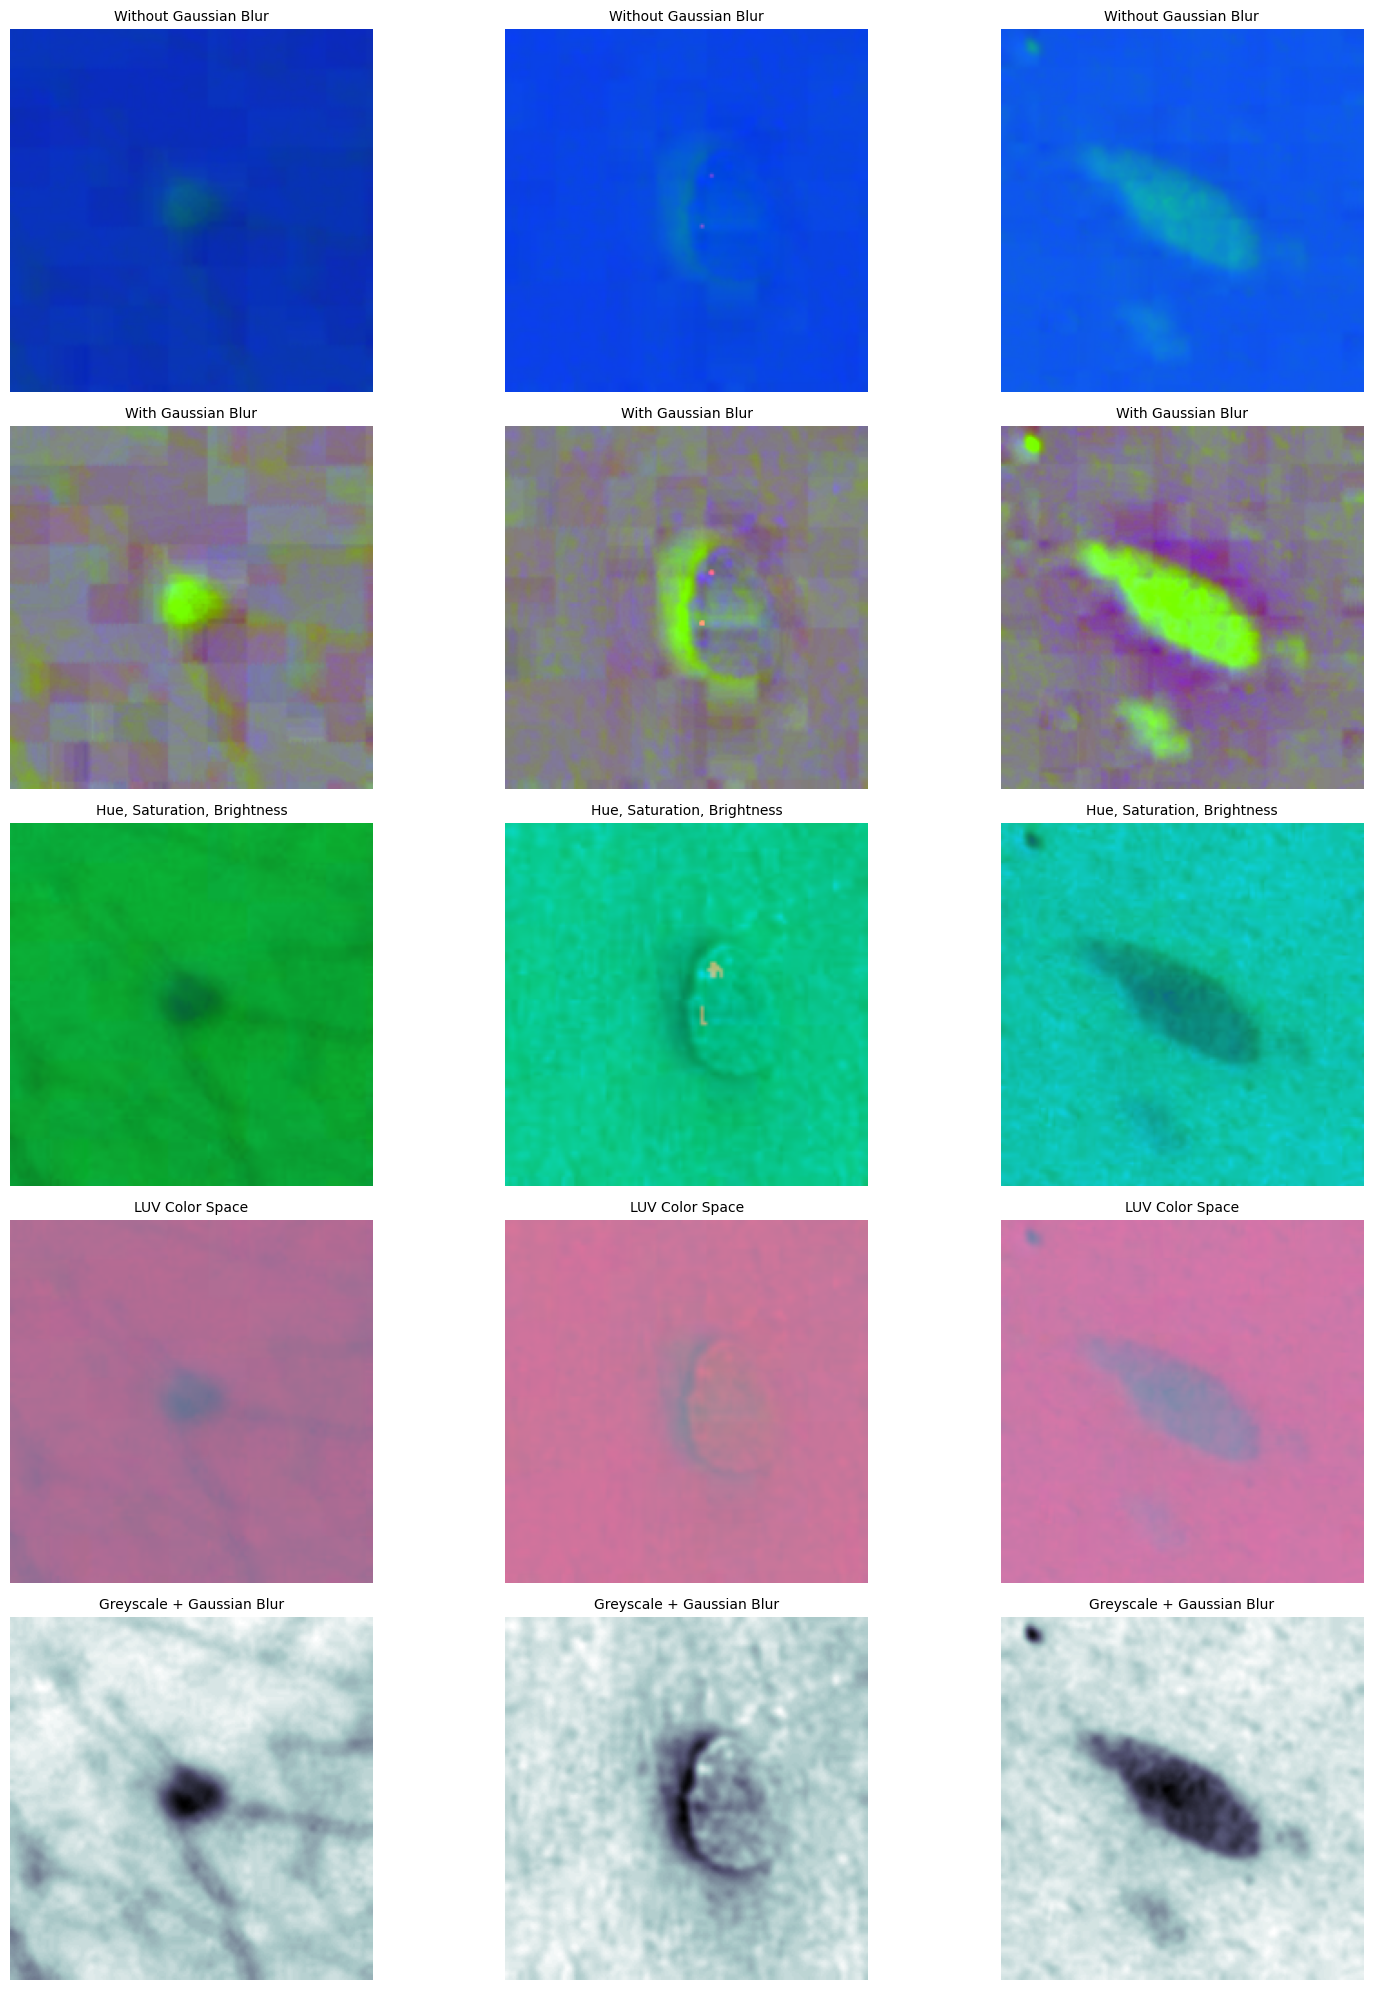

In [57]:
apply_transformations(fnames)

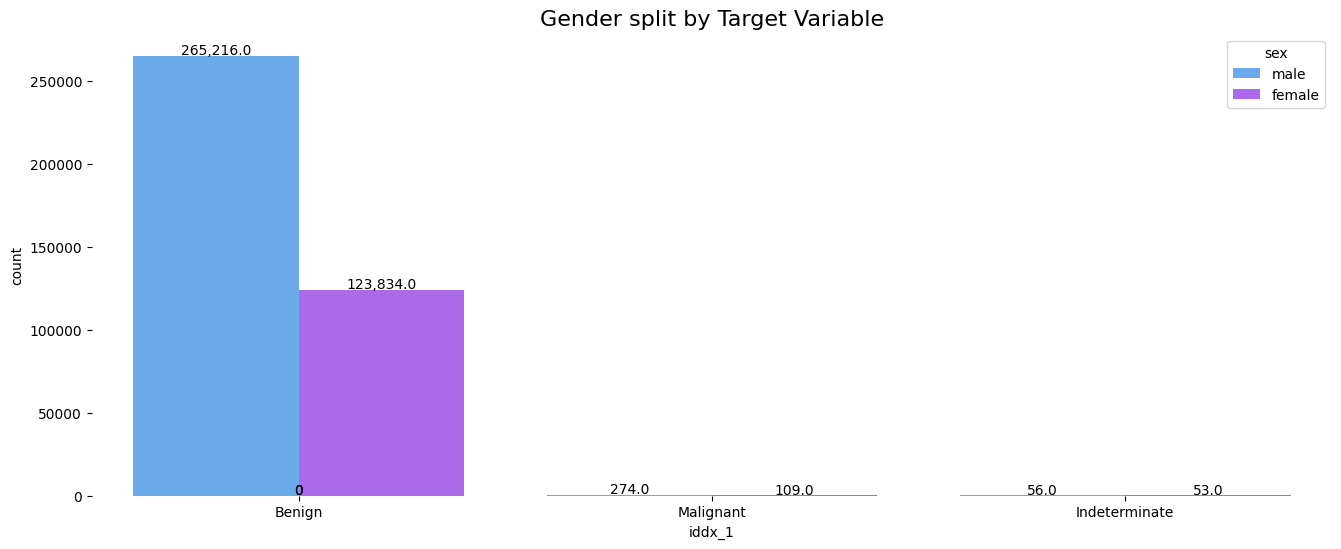

In [59]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=df, x='iddx_1', hue='sex', palette= "cool")

for p in a.patches:
    a.annotate(format(p.get_height(), ','),
           (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center',
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Gender split by Target Variable', fontsize=16)
sns.despine(left=True, bottom=True);

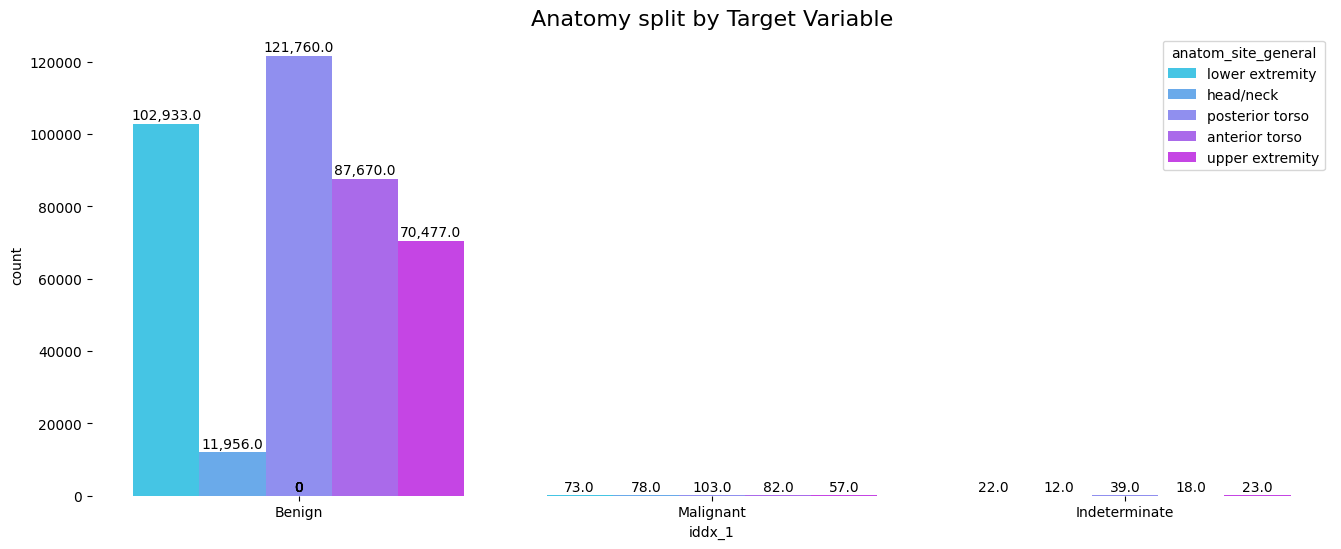

In [60]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=df, x='iddx_1', hue='anatom_site_general', palette= "cool")

for p in a.patches:
    a.annotate(format(p.get_height(), ','),
           (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.title('Anatomy split by Target Variable', fontsize=16)
sns.despine(left=True, bottom=True);

In [65]:
!pip install tensornets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.1/651.1 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tensornets: filename=tensornets-0.4.6-cp310-cp310-linux_x86_64.whl size=1495651 sha256=b16195bfeb2afd55ac5e0927374b9671e0c0be985d6a6900def6767267494d41
  Stored in directory: /root/.cache/pip/wheels/01/a5/1c/0b56f70e458ba833b02ed125cf5c5c9240175cbd9fe7af66c8
Successfully built tensornets


In [62]:

def forward_prop(model, inputs):

    # model to give the name
    if model == 'resnet50':
        logits = nets.ResNet50(inputs, is_training=True, classes=7)
        middles = logits.get_outputs()[-4]
    elif model == 'squeezenet':
        logits = nets.SqueezeNet(inputs, is_training=True, classes=7)
        middles = logits.get_outputs()[-3]

    Z1 = tf.contrib.layers.flatten(middles)
    # FULLY-CONNECTED
    Z2 = tf.contrib.layers.fully_connected(Z1, 120, normalizer_fn=tf.layers.batch_normalization)
    # FULLY-CONNECTED
    Y_hat = tf.identity(tf.contrib.layers.fully_connected(Z2, 7, activation_fn = tf.nn.softmax, normalizer_fn=tf.layers.batch_normalization), name = 'Y_hat')
    return Y_hat, logits